In [1]:
import numpy as np
import csv 
import pandas as pd
import networkx as nx
from networkx.algorithms import community
import matplotlib.pyplot as plt

/Users/lola/opt/anaconda3/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
data=pd.read_csv('/Users/lola/Desktop/Centrale_Marseille/S9/Locala/base-flux-mobilite-domicile-lieu-travail-2019.csv',sep=';')
data.columns = ['Source','LibGeo','Target','L_DCLT','weight']
NewSource = data['Source'].apply(lambda x: str(x).zfill(5))
data['Source']=NewSource
NewTarget = data['Target'].apply(lambda x: str(x).zfill(5))
data['Target']=NewTarget
#data['Target']=pd.to_numeric(data['Target'],errors='coerce',downcast='integer')
data.head()

/var/folders/gy/qsvyycp17g13v6713r0s_6s40000gn/T/ipykernel_67613/1577325310.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  data=pd.read_csv('/Users/lola/Desktop/Centrale_Marseille/S9/Locala/base-flux-mobilite-domicile-lieu-travail-2019.csv',sep=';')


,Source,LibGeo,Target,L_DCLT,weight
0,01001,L'Abergement-Clémenciat,01001,L'Abergement-Clémenciat,77.008649
1,01001,L'Abergement-Clémenciat,01053,Bourg-en-Bresse,35.518950
2,01001,L'Abergement-Clémenciat,01093,Châtillon-sur-Chalaronne,55.487306
3,01001,L'Abergement-Clémenciat,01159,Feillens,4.954723
4,01001,L'Abergement-Clémenciat,01165,Francheleins,4.820431


In [3]:
#data=data.iloc[:50000,:]
data.to_csv('temporaire')

In [4]:
G = nx.from_pandas_edgelist(data, source='Source',target='Target',edge_attr='weight')

In [5]:
print('Le graphe comporte',G.order(),'noeuds et',G.size(),'arrêtes')

Le graphe comporte 36643 noeuds et 813136 arrêtes


In [6]:
communities = community.asyn_lpa_communities(G,weight="weight")
comsLabelPropa = list(communities)

In [7]:

print(len(comsLabelPropa))
print(comsLabelPropa[0])


8537
{'39353', '01351', '01449', '01124', '01163', '01128', '01246', '01319', '01147', '01095', '01235', '01254', '01273', '01412', '71143', '39485', '01387', '01002', '01115', '01195', '01433', '01177', '01303', '01364', '01200', '01429', '01343', '01266', '01375', '01140', '01077', '01113', '01229', '01093', '01380', '01356', '01346', '01304', '39273', '01046', '01385', '01259', '01374', '01445', '01350', '01096', '01457', 'SUA54', '01053', '01291', '01151', '01052', '01317', '39363', '01296', '01383', '01434', '01328', '01125', '01127', '01146', '01072', '01388', '01145', '01369', '01299', '01139', '01321', '01451', '01241', '01197', '01335', '01334', '01355', '39080', '01108', '39378', '01090', '01084', '01188', '01045', '01056', '01422', '01406', '01212', '01130', '01367', '01001', '01382', '01230', '01363', '01432', '01368', '01314', '01381', '01085', '01393', '01336', '01405', '01301', '01038', '01069', '01391', '01074', '01024', '01129', '01289', '01272', '01245', '01344', '010

In [8]:
partition = {}
for i in range(len(comsLabelPropa)):
    for j in range(len(comsLabelPropa[i])):
        liste=list(comsLabelPropa[i])
        partition[liste[j]]=i

In [9]:
import pickle
with open('partitioncommunesLPA', 'wb') as f:
    pickle.dump(partition, f)

In [10]:
#nombre de communité total
listOfValues = partition.values()
listOfValues = list(listOfValues)
numberOfCommunities = max(listOfValues)+1

#on crée une liste par communité
communities=[[] for i in range(numberOfCommunities)]
listOfKeys = partition.keys()
for x in listOfKeys:
    i=partition[x]-1
    communities[i].append(x)

print('Il y a',numberOfCommunities,'communautés.')

Il y a 8537 communautés.


On ne trace que 25% des noeuds avec la plus grande cenralité pour simplifier le plot et on effectue le trie sur chaque communauté pour que les petites communautés ne disparaissent pas.

In [11]:
sommets_centralite_max=[]
centralite = nx.degree_centrality(G)
for i in range(len(communities)):
    l1,l2=[],{} #l1 recevra les centralités des noeuds de la communautés et l2 le code commune correspondant
    for elt in communities[i]:
        l1.append(centralite[elt])
        l2[elt]=centralite[elt]
    l1.sort()
    seuil=l1[int(len(l1)/4*3)]
    for x in l2.keys():
        if l2[x]>seuil:
            sommets_centralite_max.append(x)


In [12]:
sommets_labelisés=[]
centralite = nx.degree_centrality(G)
for i in range(len(communities)):
    l1,l2=[],[] #l1 recevra les centralités des noeuds de la communautés et l2 le code commune correspondant
    for elt in communities[i]:
        l1.append(centralite[elt])
        l2.append(elt)
    centre=l1.index(max(l1))
    sommets_labelisés.append(l2[centre])
len(sommets_labelisés)

8537

In [13]:
Source=data.loc[:,['Source','LibGeo']]
noeuds=list(Source.iloc[:,0])
labels=list(Source.iloc[:,1])
labels_nodes = {}
for i in range(len(noeuds)):
    if (noeuds[i]) in sommets_labelisés :
        labels_nodes[(noeuds[i])]=labels[i]
print((labels_nodes))

KeyboardInterrupt: 

In [ ]:
import matplotlib.cm as cm
# draw the graph
pos = nx.spring_layout(G)
# color the nodes according to their partition
cmap = cm.get_cmap('viridis', max(partition.values()) + 1)

KeyboardInterrupt: 

In [ ]:
l=list(partition.keys())
for x in l:
    if x not in sommets_centralite_max:
        del partition[x]
len(partition.keys())

1170

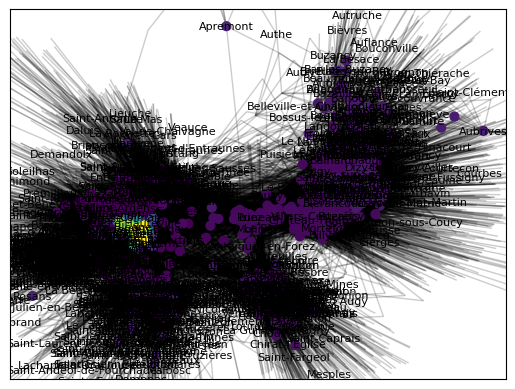

In [ ]:
nx.draw_networkx_nodes(G, pos, sommets_centralite_max, node_size=40, cmap=cmap, node_color=list(partition.values()))
nx.draw_networkx_edges(G, pos, alpha=0.2)
nx.draw_networkx_labels(G, pos, labels=labels_nodes,font_size=8,font_color='black',font_family='sans-serif')
plt.show()